#Import library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
sns.set()

#Read Data csv

In [ ]:
dataKepiting = pd.read_csv('/content/sample_data/CrabAgePrediction.csv')

In [ ]:
dataKepiting.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [ ]:
dataKepiting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [ ]:
dataKepiting.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


categorical 1 kolom => sex <br>
numerical           => 8 kolom <br>
target              => numerical 

Drop yang null value

In [ ]:
dataKepiting = dataKepiting.loc[dataKepiting['Height']!=0].reset_index(drop=True)

#Data understanding

### cek distribusi data kategorikal

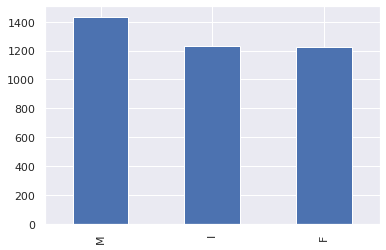

In [ ]:
dataKepiting.Sex.value_counts().plot(kind='bar') 

### cek distribusi data numerik

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b7108dc10>,
      dtype=object)

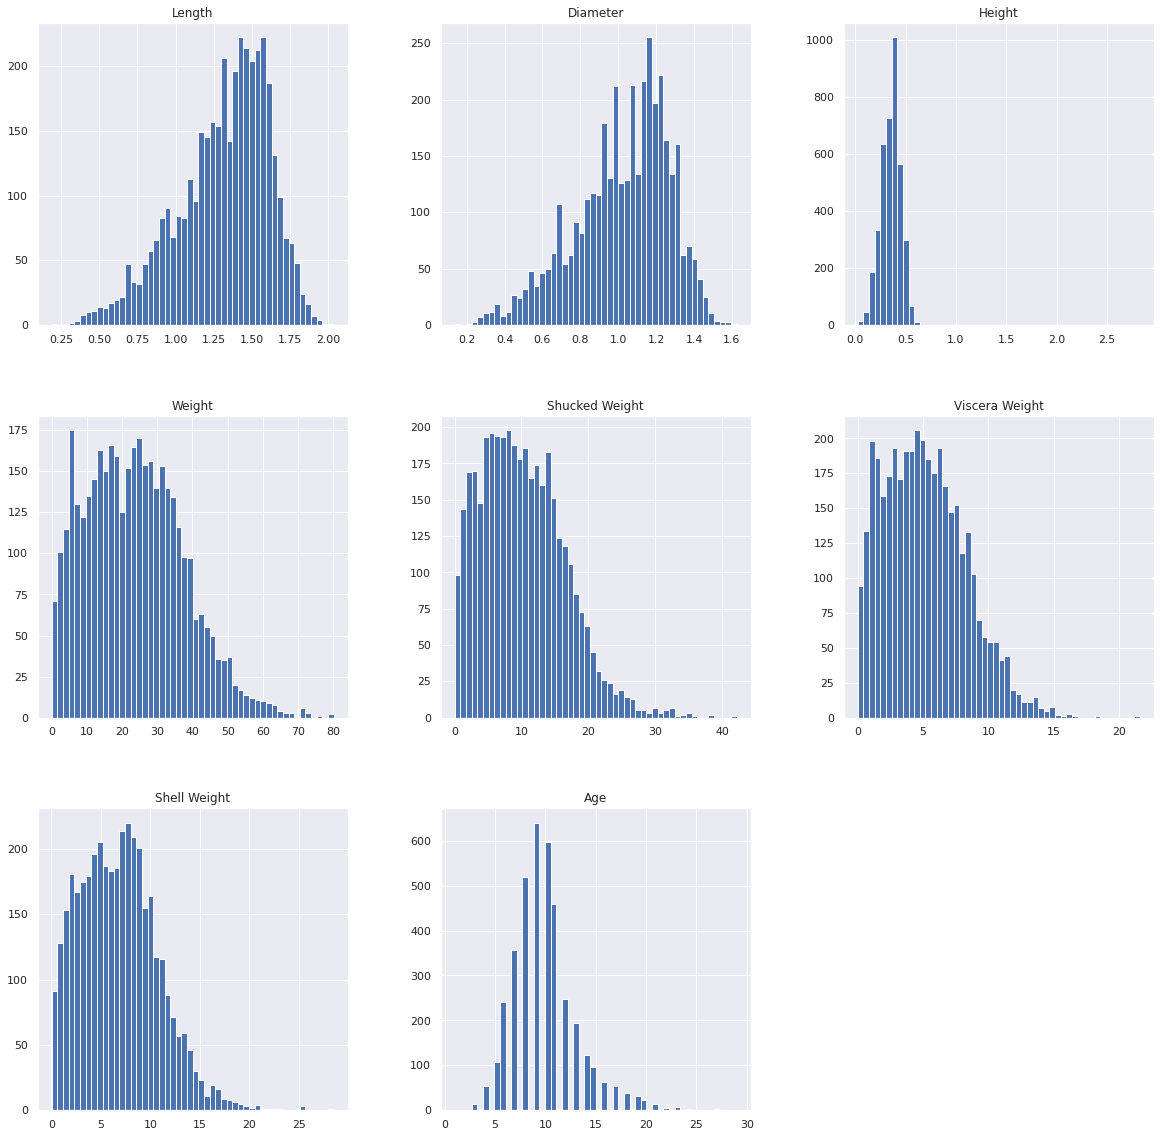

In [ ]:
dataKepiting.hist(bins=50,figsize=(20,20))

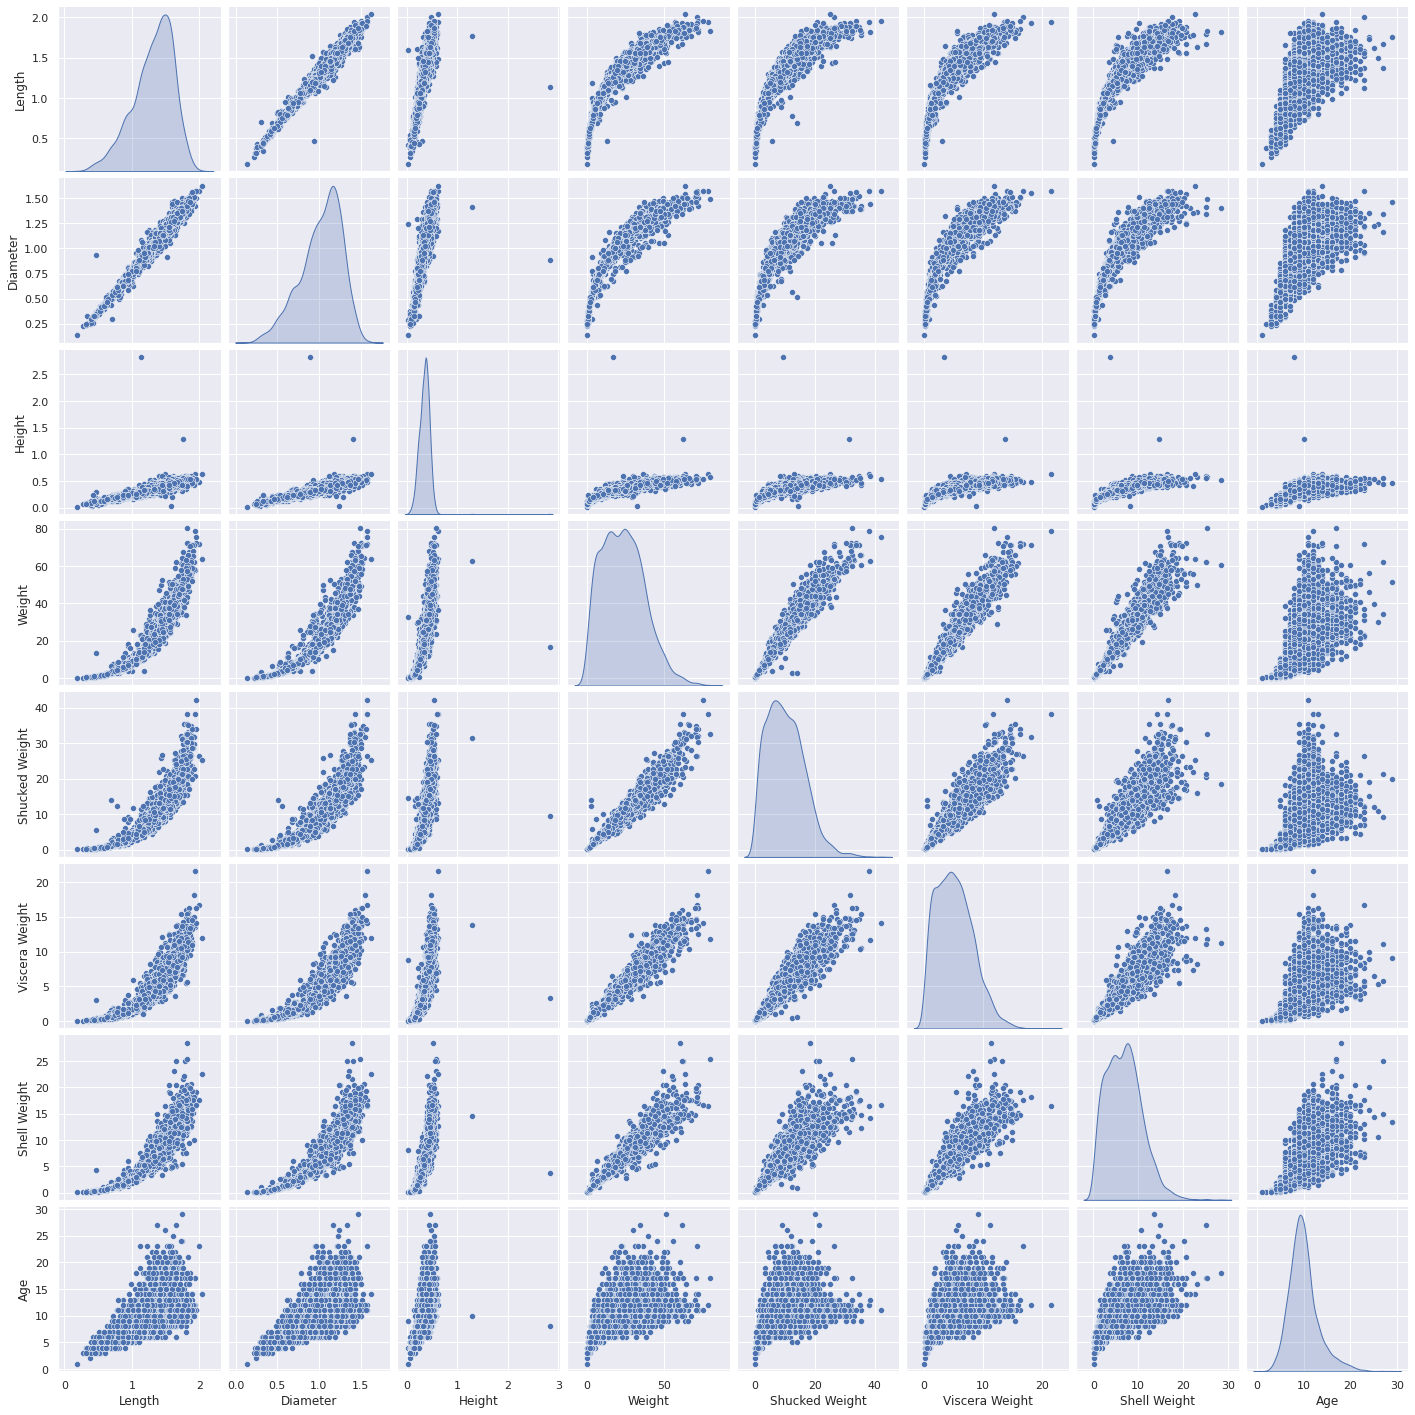

In [ ]:
sns.pairplot(dataKepiting,diag_kind='kde')

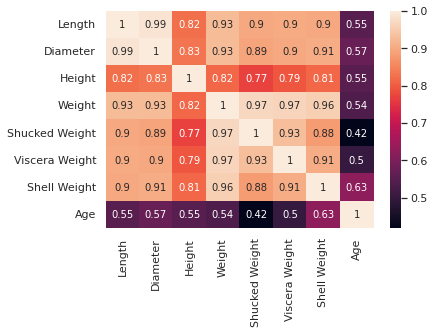

In [ ]:
sns.heatmap(dataKepiting.corr(),annot=True)

#data preparation

###one hot encoding

In [ ]:
dataKepiting = pd.concat([dataKepiting,pd.get_dummies(dataKepiting['Sex'],prefix='sex',drop_first=True)],axis=1)

In [ ]:
dataKepiting.drop(['Sex'],axis=True,inplace=True) 

In [ ]:
dataKepiting.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,sex_I,sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,0


###PCA

In [ ]:
numericData = ['Length','Diameter','Height','Weight','Shucked Weight','Viscera Weight','Shell Weight']

In [ ]:
pca = PCA(n_components=7, random_state=123)

In [ ]:
dataKepiting[numericData]

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970
...,...,...,...,...,...,...,...
3886,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637
3887,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577
3888,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864
3889,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698


In [ ]:
pca.fit_transform(dataKepiting[numericData])

array([[ 1.81744159e+00, -1.48130323e+00,  2.37583868e-01, ...,
        -1.50326054e-01,  3.69745700e-02,  4.23159375e-02],
       [-2.08503324e+01, -2.61892977e-01, -2.54710655e-01, ...,
         8.71734227e-02, -1.03187893e-02, -1.51601484e-02],
       [-1.79338576e+01,  1.88659842e-01,  1.95889774e-01, ...,
        -3.60711467e-02, -1.12211110e-02, -1.52611257e-02],
       ...,
       [-2.47783888e+01, -2.40483370e-01, -1.79297674e-01, ...,
         3.17980252e-01, -2.43925938e-03,  3.74282165e-03],
       [-1.51649426e+01, -2.40585210e-01, -1.22893068e-01, ...,
        -3.31435489e-04, -4.88880326e-03, -2.98987446e-02],
       [-2.23584886e+01,  3.69108802e-02, -4.12629484e-01, ...,
         1.65122298e-01,  6.89312992e-03,  1.76401953e-02]])

Text(0.5, 1.0, 'sum of explained variance ratio')

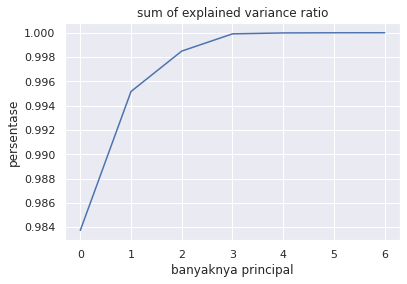

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('banyaknya principal')
plt.ylabel('persentase')
plt.title('sum of explained variance ratio')

pemilihan ckup 1 pca karena telah memenuhji 90% dari data

In [ ]:
pca = PCA(n_components=1, random_state=123)

In [ ]:
dataKepitingTereduksi = pca.fit_transform(dataKepiting[numericData])

In [ ]:
dataKepitingTereduksi = pd.concat([pd.DataFrame(dataKepitingTereduksi,columns=['fitur reduksi']),dataKepiting[['sex_M','sex_I','Age']]],axis=1)

In [ ]:
dataKepitingTereduksi

,fitur reduksi,sex_M,sex_I,Age
0,1.817442,0,0,9
1,-20.850332,1,0,6
2,-17.933858,0,1,6
3,-11.812050,0,0,10
4,-19.038282,0,1,6
...,...,...,...,...
3886,1.679745,0,0,8
3887,12.600364,0,0,10
3888,-24.778389,0,1,5
3889,-15.164943,0,1,6


###Split data

In [ ]:
X = dataKepitingTereduksi.drop(['Age'],axis=1)
Y = dataKepitingTereduksi['Age']

In [ ]:
train_data,test_data,train_target,test_target = train_test_split(X,Y,test_size=0.1,random_state=42)

### standarisasi

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(np.array(train_data['fitur reduksi']).reshape(-1,1))

StandardScaler()

In [ ]:
train_data['fitur reduksi'] = scaler.transform(np.array(train_data['fitur reduksi']).reshape(-1,1))

In [ ]:
test_data['fitur reduksi'] = scaler.transform(np.array(test_data['fitur reduksi']).reshape(-1,1))

In [ ]:
train_data.head()

,fitur reduksi,sex_M,sex_I
2471,0.808007,0,0
358,1.304933,1,0
2751,1.122279,0,0
299,-0.441790,1,0
1003,-0.061119,0,1


In [ ]:
test_data.head()

,fitur reduksi,sex_M,sex_I
3244,0.954905,1,0
2321,-0.305210,0,0
3619,-0.360182,0,0
1187,1.885301,0,0
315,0.229429,1,0


#Modeling

###KNN

In [ ]:
knn = KNeighborsRegressor()
knn.fit(train_data, train_target)
y_pred_knn = knn.predict(test_data)

### linier regression

In [ ]:
reg = reg = LinearRegression()
reg.fit(train_data, train_target)
y_pred_reg = reg.predict(test_data)

### SVR

In [ ]:
svr = SVR()
svr.fit(train_data, train_target)
y_pred_svr = svr.predict(test_data)

#Evaluation

In [ ]:
mae = pd.DataFrame(columns=['train', 'test'], index=['KNN','linear','SVR'])
 
model_dict = {'KNN': knn, 'linear': reg, 'SVR': svr}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mae.loc[name, 'train'] = mean_absolute_error(y_true=train_target, y_pred=model.predict(train_data))
    mae.loc[name, 'test'] = mean_absolute_error(y_true=test_target, y_pred=model.predict(test_data))
    mae.loc[name,'rata-rata'] = (mae.loc[name, 'train'] + mae.loc[name, 'test'])/2
 
# Panggil mse
mae

,train,test,rata-rata
KNN,1.667181,1.948718,1.807949
linear,1.940046,2.022965,1.981505
SVR,1.748537,1.810731,1.779634


###cek 1 data

In [ ]:
prediksi = test_data.iloc[:1].copy()
pred_dict = {'y_true':test_target[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_linear,prediksi_SVR
3244,11,10.0,11.6,10.6
